Notebook setup:

In [1]:
import os
import sys

In [2]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A3/A3_p1/src' #@param {type: "string"}
#sys.path.append(path)

In [5]:
%matplotlib inline

Testing
---

In [6]:
from MazeMapData import *

In [7]:
mazeData

{'A': {'Advance': 'B'},
 'B': {'Left': 'A', 'Advance': 'F', 'Right': 'C'},
 'C': {'Advance': 'B'},
 'D': {'Advance': 'M', 'Right': 'E'},
 'E': {'Left': 'D', 'Advance': 'I', 'Right': 'F'},
 'F': {'Left': 'G', 'Advance': 'B', 'Right': 'E'},
 'G': {'Left': 'F', 'Advance': 'L', 'Right': 'H'},
 'H': {'Left': 'G', 'Advance': 'N'},
 'I': {'Left': 'O', 'Advance': 'J', 'Right': 'E'},
 'J': {'Advance': 'I'},
 'K': {'Advance': 'L'},
 'L': {'Left': 'G', 'Advance': 'K', 'Right': 'Q'},
 'M': {'Advance': 'D'},
 'N': {'Advance': 'H'},
 'O': {'Left': 'T', 'Advance': 'P', 'Right': 'I'},
 'P': {'Left': 'O', 'Advance': 'AD', 'Right': 'Q'},
 'Q': {'Left': 'L', 'Advance': 'P', 'Right': 'W'},
 'R': {'Advance': 'X'},
 'S': {'Advance': 'AA'},
 'T': {'Left': 'Y', 'Advance': 'U', 'Right': 'O'},
 'U': {'Left': 'T', 'Advance': 'AC'},
 'V': {'Advance': 'AE', 'Right': 'W'},
 'W': {'Left': 'Q', 'Advance': 'V', 'Right': 'Z'},
 'X': {'Left': 'Y', 'Advance': 'R'},
 'Y': {'Left': 'T', 'Advance': 'X'},
 'Z': {'Advance': '

In [8]:
mazeLocations

{'A': (0, 0),
 'B': (7, 0),
 'C': (13, 0),
 'D': (1, 2),
 'E': (3, 2),
 'F': (7, 2),
 'G': (11, 2),
 'H': (13, 2),
 'I': (3, 4),
 'J': (6, 4),
 'K': (8, 4),
 'L': (11, 4),
 'M': (1, 5),
 'N': (13, 5),
 'O': (3, 6),
 'P': (7, 6),
 'Q': (11, 6),
 'R': (1, 7),
 'S': (13, 7),
 'T': (3, 8),
 'U': (5, 8),
 'V': (9, 8),
 'W': (11, 8),
 'X': (1, 10),
 'Y': (3, 10),
 'Z': (11, 10),
 'AA': (13, 10),
 'AB': (1, 12),
 'AC': (5, 12),
 'AD': (7, 12),
 'AE': (9, 12),
 'AF': (14, 12)}

In [9]:
#Technically mazeGraphClass.
from mazeMapClass import mazeMap

maze = mazeMap(mazeData,mazeLocations)
print(maze.get('A'))
print(maze.get('A','B'))
print(maze.get('A','C'))
print(maze.getLocation('B'))

maze.nodes()

{'B': 1}
1
None
(7, 0)


['AB',
 'M',
 'Q',
 'AF',
 'F',
 'O',
 'C',
 'L',
 'Y',
 'AD',
 'S',
 'AA',
 'D',
 'Z',
 'AC',
 'X',
 'T',
 'R',
 'A',
 'P',
 'V',
 'N',
 'U',
 'B',
 'W',
 'AE',
 'G',
 'H',
 'J',
 'E',
 'K',
 'I']

In [10]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
G = nx.Graph(maze.g)
G.nodes

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF'))

In [12]:
nodes_colors = ['black' for node in maze.graph_dict.keys()]
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

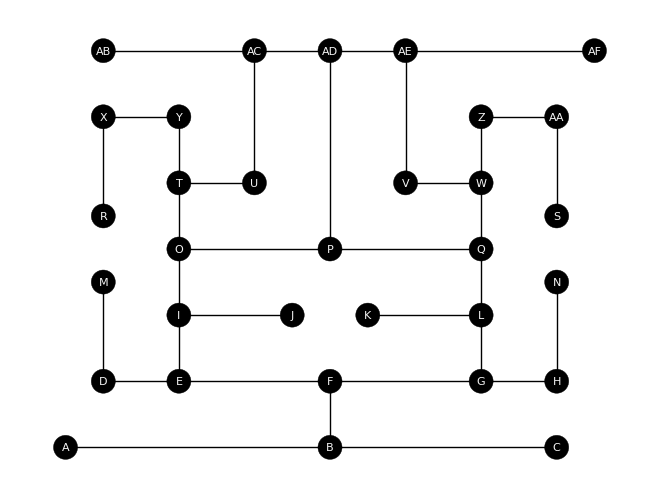

In [13]:
nx.draw(G, pos={k: maze.locations[k] for k in G.nodes()},
            node_color=nodes_colors, linewidths=0.3, edgecolors='k')
node_label_pos = { k:[v[0],v[1]]  for k,v in maze.locations.items() }
node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=8, font_color='whitesmoke')

Task 2
---

In [14]:
#See makeDATA()
#See deliveryProblemSolvingAgentProClass.py in Task 3
#See vacuumProblemSolvingAgentShowClass.py

In [15]:
from MazeMapData import *
from mazeWorldData import *
from mazeMapClass import mazeMap

In [16]:
makeData()

{'A': {'Advance': 'B'},
 'B': {'Left': 'A', 'Advance': 'F', 'Right': 'C'},
 'C': {'Advance': 'B'},
 'D': {'Advance': 'M', 'Right': 'E'},
 'E': {'Left': 'D', 'Advance': 'I', 'Right': 'F'},
 'F': {'Left': 'G', 'Advance': 'B', 'Right': 'E'},
 'G': {'Left': 'F', 'Advance': 'L', 'Right': 'H'},
 'H': {'Left': 'G', 'Advance': 'N'},
 'I': {'Left': 'O', 'Advance': 'J', 'Right': 'E'},
 'J': {'Advance': 'I'},
 'K': {'Advance': 'L'},
 'L': {'Left': 'G', 'Advance': 'K', 'Right': 'Q'},
 'M': {'Advance': 'D'},
 'N': {'Advance': 'H'},
 'O': {'Left': 'T', 'Advance': 'P', 'Right': 'I'},
 'P': {'Left': 'O', 'Advance': 'AD', 'Right': 'Q'},
 'Q': {'Left': 'L', 'Advance': 'P', 'Right': 'W'},
 'R': {'Advance': 'X'},
 'S': {'Advance': 'AA'},
 'T': {'Left': 'Y', 'Advance': 'U', 'Right': 'O'},
 'U': {'Left': 'T', 'Advance': 'AC'},
 'V': {'Advance': 'AE', 'Right': 'W'},
 'W': {'Left': 'Q', 'Advance': 'V', 'Right': 'Z'},
 'X': {'Left': 'Y', 'Advance': 'R'},
 'Y': {'Left': 'T', 'Advance': 'X'},
 'Z': {'Advance': '

In [17]:
mazeStateLocations()

{'A': (0, 0),
 'B': (7, 0),
 'C': (13, 0),
 'D': (1, 2),
 'E': (3, 2),
 'F': (7, 2),
 'G': (11, 2),
 'H': (13, 2),
 'I': (3, 4),
 'J': (6, 4),
 'K': (8, 4),
 'L': (11, 4),
 'M': (1, 5),
 'N': (13, 5),
 'O': (3, 6),
 'P': (7, 6),
 'Q': (11, 6),
 'R': (1, 7),
 'S': (13, 7),
 'T': (3, 8),
 'U': (5, 8),
 'V': (9, 8),
 'W': (11, 8),
 'X': (1, 10),
 'Y': (3, 10),
 'Z': (11, 10),
 'AA': (13, 10),
 'AB': (1, 12),
 'AC': (5, 12),
 'AD': (7, 12),
 'AE': (9, 12),
 'AF': (14, 12)}

In [18]:
from mazeMapClass import mazeMap

mazeWorldGraph = mazeMap(makeData(), mazeStateLocations())

In [19]:
mazeWorldGraph.g

{'A': {'B': 1},
 'B': {'A': 1, 'F': 1, 'C': 1},
 'C': {'B': 1},
 'D': {'M': 1, 'E': 1},
 'E': {'D': 1, 'I': 1, 'F': 1},
 'F': {'G': 1, 'B': 1, 'E': 1},
 'G': {'F': 1, 'L': 1, 'H': 1},
 'H': {'G': 1, 'N': 1},
 'I': {'O': 1, 'J': 1, 'E': 1},
 'J': {'I': 1},
 'K': {'L': 1},
 'L': {'G': 1, 'K': 1, 'Q': 1},
 'M': {'D': 1},
 'N': {'H': 1},
 'O': {'T': 1, 'P': 1, 'I': 1},
 'P': {'O': 1, 'AD': 1, 'Q': 1},
 'Q': {'L': 1, 'P': 1, 'W': 1},
 'R': {'X': 1},
 'S': {'AA': 1},
 'T': {'Y': 1, 'U': 1, 'O': 1},
 'U': {'T': 1, 'AC': 1},
 'V': {'AE': 1, 'W': 1},
 'W': {'Q': 1, 'V': 1, 'Z': 1},
 'X': {'Y': 1, 'R': 1},
 'Y': {'T': 1, 'X': 1},
 'Z': {'AA': 1, 'W': 1},
 'AA': {'S': 1, 'Z': 1},
 'AB': {'AC': 1},
 'AC': {'AD': 1, 'U': 1, 'AB': 1},
 'AD': {'AE': 1, 'P': 1, 'AC': 1},
 'AE': {'AF': 1, 'V': 1, 'AD': 1},
 'AF': {'AE': 1}}

In [20]:
mazeWorldGraph.graph_dict

{'A': {'Advance': 'B'},
 'B': {'Left': 'A', 'Advance': 'F', 'Right': 'C'},
 'C': {'Advance': 'B'},
 'D': {'Advance': 'M', 'Right': 'E'},
 'E': {'Left': 'D', 'Advance': 'I', 'Right': 'F'},
 'F': {'Left': 'G', 'Advance': 'B', 'Right': 'E'},
 'G': {'Left': 'F', 'Advance': 'L', 'Right': 'H'},
 'H': {'Left': 'G', 'Advance': 'N'},
 'I': {'Left': 'O', 'Advance': 'J', 'Right': 'E'},
 'J': {'Advance': 'I'},
 'K': {'Advance': 'L'},
 'L': {'Left': 'G', 'Advance': 'K', 'Right': 'Q'},
 'M': {'Advance': 'D'},
 'N': {'Advance': 'H'},
 'O': {'Left': 'T', 'Advance': 'P', 'Right': 'I'},
 'P': {'Left': 'O', 'Advance': 'AD', 'Right': 'Q'},
 'Q': {'Left': 'L', 'Advance': 'P', 'Right': 'W'},
 'R': {'Advance': 'X'},
 'S': {'Advance': 'AA'},
 'T': {'Left': 'Y', 'Advance': 'U', 'Right': 'O'},
 'U': {'Left': 'T', 'Advance': 'AC'},
 'V': {'Advance': 'AE', 'Right': 'W'},
 'W': {'Left': 'Q', 'Advance': 'V', 'Right': 'Z'},
 'X': {'Left': 'Y', 'Advance': 'R'},
 'Y': {'Left': 'T', 'Advance': 'X'},
 'Z': {'Advance': '

In [21]:
mazeWorldGraph.nodes()

['AB',
 'M',
 'Q',
 'AF',
 'F',
 'O',
 'C',
 'L',
 'Y',
 'AD',
 'S',
 'AA',
 'D',
 'Z',
 'AC',
 'X',
 'T',
 'R',
 'A',
 'P',
 'V',
 'N',
 'U',
 'B',
 'W',
 'AE',
 'G',
 'H',
 'J',
 'E',
 'K',
 'I']

In [22]:
mazeWorldGraph.get('A')

{'B': 1}

In [23]:
mazeWorldGraph.getLocation('A')

(0, 0)

In [24]:
G = nx.Graph(mazeWorldGraph.g) #g

In [25]:
G.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF'))

In [26]:
node_label_pos = { k:[v[0],v[1]]  for k,v in mazeWorldGraph.locations.items() }

In [27]:
node_label_pos

{'A': [0, 0],
 'B': [7, 0],
 'C': [13, 0],
 'D': [1, 2],
 'E': [3, 2],
 'F': [7, 2],
 'G': [11, 2],
 'H': [13, 2],
 'I': [3, 4],
 'J': [6, 4],
 'K': [8, 4],
 'L': [11, 4],
 'M': [1, 5],
 'N': [13, 5],
 'O': [3, 6],
 'P': [7, 6],
 'Q': [11, 6],
 'R': [1, 7],
 'S': [13, 7],
 'T': [3, 8],
 'U': [5, 8],
 'V': [9, 8],
 'W': [11, 8],
 'X': [1, 10],
 'Y': [3, 10],
 'Z': [11, 10],
 'AA': [13, 10],
 'AB': [1, 12],
 'AC': [5, 12],
 'AD': [7, 12],
 'AE': [9, 12],
 'AF': [14, 12]}

In [28]:
edge_weights = {(k, v2) : k2 for k, v in mazeWorldGraph.graph_dict.items() for k2, v2 in v.items()}#actions

In [29]:
edge_weights

{('A', 'B'): 'Advance',
 ('B', 'A'): 'Left',
 ('B', 'F'): 'Advance',
 ('B', 'C'): 'Right',
 ('C', 'B'): 'Advance',
 ('D', 'M'): 'Advance',
 ('D', 'E'): 'Right',
 ('E', 'D'): 'Left',
 ('E', 'I'): 'Advance',
 ('E', 'F'): 'Right',
 ('F', 'G'): 'Left',
 ('F', 'B'): 'Advance',
 ('F', 'E'): 'Right',
 ('G', 'F'): 'Left',
 ('G', 'L'): 'Advance',
 ('G', 'H'): 'Right',
 ('H', 'G'): 'Left',
 ('H', 'N'): 'Advance',
 ('I', 'O'): 'Left',
 ('I', 'J'): 'Advance',
 ('I', 'E'): 'Right',
 ('J', 'I'): 'Advance',
 ('K', 'L'): 'Advance',
 ('L', 'G'): 'Left',
 ('L', 'K'): 'Advance',
 ('L', 'Q'): 'Right',
 ('M', 'D'): 'Advance',
 ('N', 'H'): 'Advance',
 ('O', 'T'): 'Left',
 ('O', 'P'): 'Advance',
 ('O', 'I'): 'Right',
 ('P', 'O'): 'Left',
 ('P', 'AD'): 'Advance',
 ('P', 'Q'): 'Right',
 ('Q', 'L'): 'Left',
 ('Q', 'P'): 'Advance',
 ('Q', 'W'): 'Right',
 ('R', 'X'): 'Advance',
 ('S', 'AA'): 'Advance',
 ('T', 'Y'): 'Left',
 ('T', 'U'): 'Advance',
 ('T', 'O'): 'Right',
 ('U', 'T'): 'Left',
 ('U', 'AC'): 'Advance',

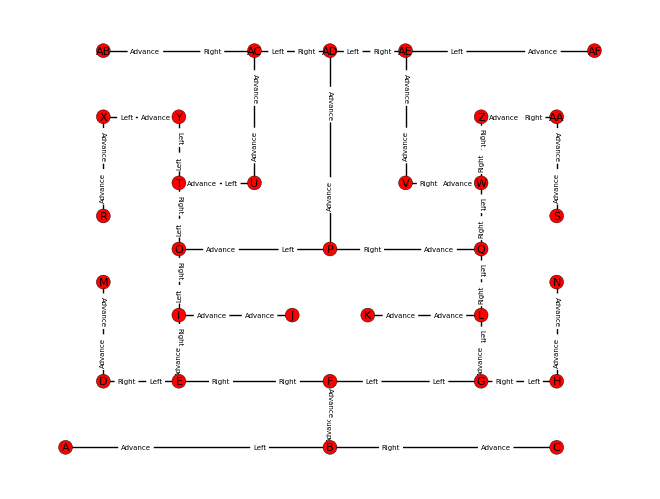

In [64]:
nx.draw(G, pos={k: mazeWorldGraph.locations[k] for k in G.nodes()},
            node_color=['red' for node in mazeWorldGraph.g.keys()],
            linewidths=0.3, edgecolors='k', node_size=100)
# draw labels for nodes
node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=8)
# add edge lables to the graph
nx.draw_networkx_edge_labels(G, pos=mazeWorldGraph.locations, edge_labels=edge_weights, font_size=5, font_color = 'k', label_pos = 0.25)
plt.show()

In [31]:
from mazeProblemClass import MazeProblem

initState = 'A'
initState

'A'

In [32]:
import random

temp = mazeWorldGraph.nodes()
temp.remove('A')
temp.remove('AF')

pileOfGold = random.choice(temp)
temp.remove(pileOfGold)
diamond = random.choice(temp)
temp.remove(diamond)
flyer = random.choice(temp)

goalState = [pileOfGold, diamond, flyer]
goalState

['E', 'AB', 'X']

In [33]:
mp1 = MazeProblem(initState, goalState, mazeWorldGraph)

In [34]:
mp1.actions('A')

['Advance']

In [35]:
print(mp1.result('A', 'Left'), mp1.result('A', 'Advance'), mp1.result('A', 'Right'))

None B None


In [36]:
cost = 0

In [37]:
print(mp1.path_cost(cost, 'A', 'Left', 'B')) #verify
print(mp1.path_cost(cost, 'A', 'Advance', 'B'))
print(mp1.path_cost(cost, 'A', 'Right', 'B')) #verify

1
1
1


In [38]:
from mazeProblemSolvingAgentClass import MazeProblemSolvingAgent

In [39]:
mpsa1 = MazeProblemSolvingAgent(initState, mazeWorldGraph, goalState)

In [40]:
mpsa1.update_state(mpsa1.state, 'A')

'A'

In [41]:
mpsa1.state

'A'

In [42]:
mp1.actions('A')

['Advance']

In [43]:
mpsa1.formulate_problem(mpsa1.state, mpsa1.goal).actions('A')

['Advance']

In [44]:
from agentsPrograms import BestFirstSearchAgentProgram

In [45]:
mp1

In [46]:
mp1.initial

'A'

In [47]:
BFSAP1 = BestFirstSearchAgentProgram()

In [48]:
seq = BFSAP1(mp1)

<Node A>
<Node B>
<Node C>
<Node F>
<Node E>


In [49]:
seq

<Node E>

In [50]:
seq.path()

[<Node A>, <Node B>, <Node F>, <Node E>]

In [51]:
from mazeAgents import ProblemSolvingMazeAgentBFS

In [52]:
BFSagent1=ProblemSolvingMazeAgentBFS(initState,mazeWorldGraph,goalState)

In [53]:
BFSagent1.seq

[]

In [54]:
BFSagent1.update_state(mpsa1.state,'A')

'A'

In [55]:
goalState #temp

['E', 'AB', 'X']

In [56]:
print(BFSagent1('A'))

<Node A>
<Node B>
<Node C>
<Node F>
<Node E>
Solution (a sequence of actions) from the initial state to a goal: ['Advance', 'Advance', 'Right']
Advance


In [57]:
allNodeColors=[]
nSteps=0

In [58]:
initState

'A'

In [62]:
goalState

['E', 'AB', 'X']

In [59]:
from mazeAgents import ProblemSolvingMazeAgentBFSwithShow

In [60]:
BFSagent2=ProblemSolvingMazeAgentBFSwithShow(initState,mazeWorldGraph,goalState)

Solution (a sequence of actions) from the initial state to a goal: ['Advance', 'Advance', 'Right']


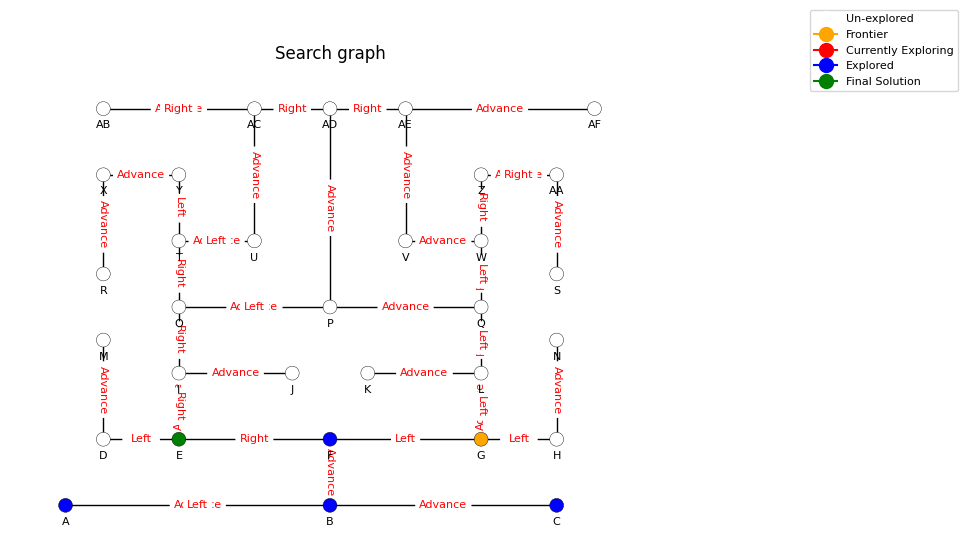

['Advance', 'Advance', 'Right']

In [61]:
BFSagent2.work('A')